In [1]:
import pandas as pd
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

# Introduction

The Goal: To find which neighborhood in Pittsburgh is the most on-fire. Theoretically, whichever neighborhood that has the most fire incidents is also the neighborhood which uses the most water - to put the fires out. 

In [2]:
fires = pd.read_csv("fire_alert.csv", sep= ",")
fireDF = fires.loc[:, ["incident_type", "type_description", "neighborhood"]]
##Higher the number for incident_type, the less intense the fire is
##only problem is coverting NaN to whatever the next upcoming value is
##since the first 3 NaN are actually Fineview,and each NaN is actually whatever the following neighborhood is
##once I do that, I can get the scatterplot up and running.
fireDF = fireDF.dropna()
fireDF
##There is the printed value without any NaN values - simply removing them instead of applying them
##since. there are still *plenty* of results to sort through

,incident_type,type_description,neighborhood
3,131.0,Passenger vehicle fire,Fineview
4,111.0,Building fire,Fairywood
5,150.0,"Outside rubbish fire, Other",South Side Flats
6,113.0,"Cooking fire, confined to container",Allegheny Center
7,111.0,Building fire,Lincoln-Lemington-Belmar
...,...,...,...
8919,150.0,"Outside rubbish fire, Other",Manchester
8920,118.0,"Trash or rubbish fire, contained",Allentown
8921,130.0,"Mobile property (vehicle) fire, Other",South Side Flats
8923,113.0,"Cooking fire, confined to container",Middle Hill


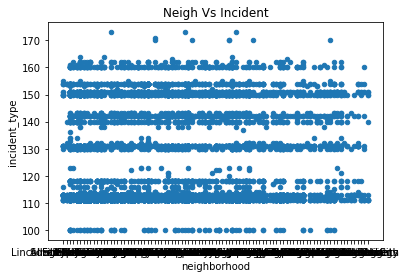

In [50]:
##and once the scatterplot is finished (which will be here), I'll be able to figure out how to get the map up and running
##and convert the map data into. something usable
##then finally, attribute scatterplot info to the map, with added legend using markdown! 
fireDF.plot(kind='scatter', x='neighborhood', y='incident_type', title='Neigh Vs Incident')

In [1]:
##Need a different graph, like a bar graph
##Have to create a dictionary that adds the incident_type value onto each neighborhood, 
##then use that dictionary to create a dataframe for neighborhood vs fire value, with the assumption being the lowest
##value is the most on-fire. 

In [2]:
##,,,how to create the dictionary tho. that is the question of the hour. I always choose the most important lessons
##to be the worst at, huh. 
##I can figure out basic theoreticals, like. if 'neighborhood' doesn't exist, append to dictionary and add 'incident_type',
##and if 'neighborhood' exists, add 'incident_type' to current incident_type value.
##However, the theoretical structure doesn't tell me the actual structure of the code, like it would with painting or writing.

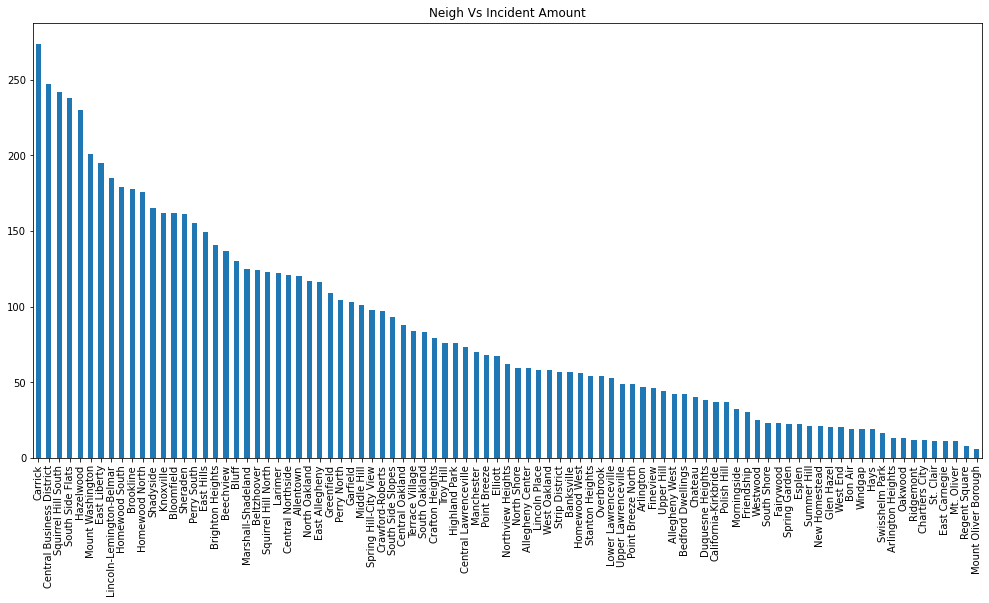

In [8]:
##Let's try this:
barLine = fireDF['neighborhood'].value_counts().plot(kind='bar', figsize = (17,8),
                                                                  rot=90,x='neighborhood',
                                                                  y='incident_type', title='Neigh Vs Incident Amount')
barLine
##this is the graph of how many times each neighborhood shows up,,, need each neighborhood's totaled incident value

In [21]:
neigh_count = fireDF['neighborhood'].value_counts()
neigh_count
##now to try and get every value here

Carrick                      274
Central Business District    247
Squirrel Hill South          242
South Side Flats             238
Hazelwood                    230
                            ... 
St. Clair                     11
East Carnegie                 11
Mt. Oliver                    11
Regent Square                  8
Mount Oliver Borough           6
Name: neighborhood, Length: 91, dtype: int64

In [33]:
print(neigh_count.to_string())
##this should finally print every value available

Carrick                      274
Central Business District    247
Squirrel Hill South          242
South Side Flats             238
Hazelwood                    230
Mount Washington             201
East Liberty                 195
Lincoln-Lemington-Belmar     185
Homewood South               179
Brookline                    178
Homewood North               176
Shadyside                    165
Knoxville                    162
Bloomfield                   162
Sheraden                     161
Perry South                  155
East Hills                   149
Brighton Heights             141
Beechview                    137
Bluff                        130
Marshall-Shadeland           125
Beltzhoover                  124
Squirrel Hill North          123
Larimer                      122
Central Northside            121
Allentown                    120
North Oakland                117
East Allegheny               116
Greenfield                   109
Perry North                  104
Garfield  

In [2]:
##Ok, it's all organized by neighborhood and how many fires were in each,,, now to find the total fire values per neighborhood
##this is where the dictionary and looping comes in, and then meet in the middle -
##neighborhood with average lowest fire and highest appearances will be the top
##get top 5 values of those and it's complete!

In [4]:
SummedVal = fireDF.groupby('neighborhood')['incident_type'].sum()
print(SummedVal.to_string())
##grouping the neighborhood names by their incident values and then summing those seems. much simpler than trying to create 
##a dictionary. now to convert this all to a graph! Somehow!

neighborhood
Allegheny Center              7791.0
Allegheny West                5608.0
Allentown                    14974.0
Arlington                     6200.0
Arlington Heights             1554.0
Banksville                    7289.0
Bedford Dwellings             5165.0
Beechview                    17362.0
Beltzhoover                  15347.0
Bloomfield                   20769.0
Bluff                        16631.0
Bon Air                       2513.0
Brighton Heights             17764.0
Brookline                    23104.0
California-Kirkbride          4757.0
Carrick                      34843.0
Central Business District    31923.0
Central Lawrenceville         9413.0
Central Northside            14974.0
Central Oakland              11037.0
Chartiers City                1576.0
Chateau                       5505.0
Crafton Heights               9839.0
Crawford-Roberts             12183.0
Duquesne Heights              4661.0
East Allegheny               14617.0
East Carnegie            

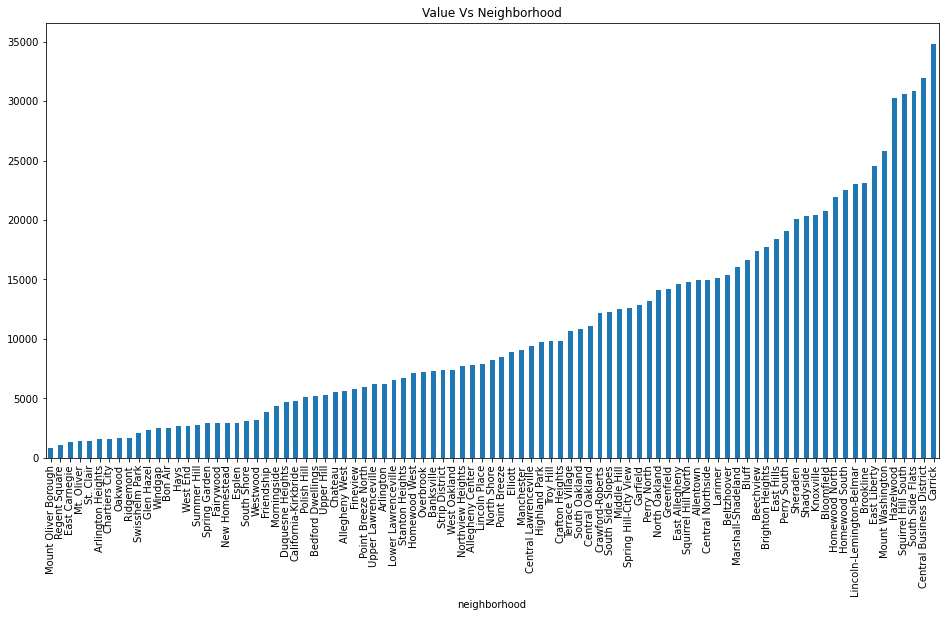

In [10]:
TotalVal = SummedVal.sort_values().plot(kind='bar', figsize = (16,8), rot=90, title="Value Vs Neighborhood")
TotalVal
##puts the series above into a chart with data that can be easier read

In [9]:
##My original goal was to find the neighborhoods with the fewest total fire reports while still being high on the
##value scale. However, the top 5 in the value scale are so much higher than the rest, while still not having
##many more reports than the other neighborhoods listed. So. Those 5 are:

In [15]:
SummedVal.sort_values(ascending=False)

neighborhood
Carrick                      34843.0
Central Business District    31923.0
South Side Flats             30820.0
Squirrel Hill South          30632.0
Hazelwood                    30267.0
                              ...   
St. Clair                     1425.0
Mt. Oliver                    1410.0
East Carnegie                 1282.0
Regent Square                 1059.0
Mount Oliver Borough           806.0
Name: incident_type, Length: 91, dtype: float64

# Conclusion

So, the top 5 most on-fire, and as such, most in need of water neighborhoods in Pittsburgh, are Carrick, Central Business District, South Side Flats, Squirrel Hill South, and Hazelwood. These five neighborhoods have been reported the most times, while also having far, far higher values for their fire total incident value counts compared to the rest of the neighborhoods. I didn't expect these five to be the highest, as originally, the purpose of doing both charts was to check which has the highest incident value while also being relatively lower on the chart for total incidents reported. However, these top 5 had values so much higher than the rest of the neighborhoods, while still not being especially higher than eachother or other neighborhoods on the total reported chart, that they would obviously be the 'most-on-fire' neighborhoods. Their incident value counts couldn't be so high otherwise. 

In [17]:
##The NFPA requires one hydrant per 800 feet. So now I need to find the total number of feet per these neighborhoods, then
##figure out hydrants per feet, then multiply *those* values by amount of liters a hydrant can hold
##As there is no specific dataset on fire hydrants, I have needed to guesstimate and use math to try and find these values 
##for the final total comparison.

##Carrick - 1.673 mi - 8833.44 feet = roughly 11 fire hydrants in the given area
##Central Business - 0.641 mi - 3384.48 feet = roughly 4 fire hydrants in the given area
##South Side FLats - 0.936 mi - 4942.08 feet = roughly 6 fire hydrants in the given area
##Squirrel Hill South - 2.671 mi - 14102.88 feet = roughly 18 fire hydrants in the given area
##Hazelwood - 1.583 mi - 8358.24 feet = roughly 10 fire hydrants in the given area

##There are different colored fire hydrants per the amount of gallons of water they use per minute. However, as I don't know
##the colors of these hydrants, I'll simply use the average amount between the three: 500 gallons per minute (gpm).
##Gpm to Lpm (liters per minute) is 1 to 3.7854, so, using that to multiply by fire hydrant count and gallon count, 
##you arrive at:

## Carrick - an average of 20819.7 liters
## Central Business District - an average of 7570.8 liters
## South Side Flats - an average of 11356.2 liters
## Squirrel Hill South - an average of 34068.6 liters
##Hazelwood - an average of 18927 liters